In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import levene
from scipy.stats import f 
from matplotlib.patches import Patch
pd.set_option('display.float_format', '{:.7f}'.format)
df = pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",sheet_name="Practice Portfolio 10 data")




The right tail value  96.75237464
The left tail value  54.30534543
There is no significant difference in variances (lower tail).
F-Statistic: 0.7568199451965625
P-Value: 1.3484083497999344
Degrees of Freedom: 11 12
Right-tail p-value: 0.3257958251000328
Critical Value for F (one-tail): 0.4527498715094809
F-Test Two-Sample for Variances

                     Reaction time_1_Submitted Before (ms)  \
Mean                                           312.8333330   
Variance                                      3689.0606060   
Observations                                    12.0000000   
df                                              11.0000000   
F                                                0.7568199   
P(F<=f) one-tail                                 0.3257958   
F Critical one-tail                              0.4527499   

                     Reaction time_1_Submitted After (ms)  
Mean                                          260.6153850  
Variance                                  

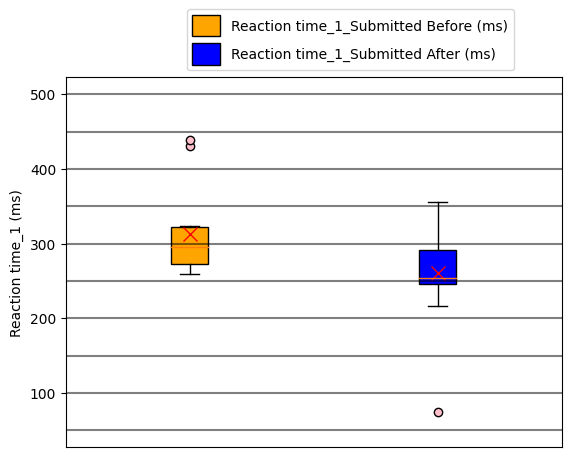

H_0 The variance in  reaction time 1 for those who submitted before is less than or equal to  those who submiited after

H_a The variance in reaction time 1 for those who submitted before is more than those who submitted after

Don't rejct null because P 0.3258 < alpha 0.1 is false 


In [12]:
#Dealing with the "Reaction time_1 set"
df['Reaction time_1 (ms)']=  pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=["Reaction time_1 (ms)"])
df['Reaction time_1_Submitted Before (ms)'] =  pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=['Reaction time_1_Submitted Before (ms)'])
df['Reaction time_1_Submitted After (ms)'] = pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=['Reaction time_1_Submitted After (ms)'])

x_time_1_before = df['Reaction time_1_Submitted Before (ms)'].dropna()
y_time_1_after = df['Reaction time_1_Submitted After (ms)'].dropna()


description_reaction_1 = df['Reaction time_1 (ms)'].describe().dropna()
description_reaction_2= df["Reaction time_1_Submitted After (ms)"].describe().dropna()


print("\n")
std_deviation = description_reaction_1['std']   
after_mean = round(np.mean(y_time_1_after),6)
before_mean = round(np.mean(x_time_1_before),6)

left_chi_value = chi2.ppf(0.975, 24)
converserion_left_value = (24* pow(std_deviation,2)) / left_chi_value
left_tail = round(np.sqrt(converserion_left_value),8)
right_chi_value = chi2.ppf(0.025, 24)
converserion_right_value = (24* pow(std_deviation,2)) / right_chi_value
right_tail = round(np.sqrt(converserion_right_value),8)
'''Left & Right tails'''
print("The right tail value ",right_tail)

print("The left tail value ",left_tail)

# Remove rows with NaN values from the specified column

statistic, p_value = levene(x_time_1_before , y_time_1_after)

alpha = 0.1
if p_value < alpha / 2:
    print("The variances are significantly different (lower tail).")
else:
    print("There is no significant difference in variances (lower tail).")
#question about p_value 


variance1 = round(np.var(x_time_1_before, ddof=1),6)  # ddof=1 for sample variance
variance2 = round(np.var(y_time_1_after, ddof=1),6)

#the F-statistic
f_statistic = variance1 / variance2

# Degrees of freedom for the two samples
df1 = len(x_time_1_before) - 1
df2 = len(y_time_1_after) - 1
left_p_value = 1 - p_value

p_value = 2 * (1 - f.cdf(f_statistic, df1, df2))

# significance level
alpha =  0.10 



# Print results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("Degrees of Freedom:", df1, df2)
p_value_right = f.cdf(f_statistic, df1, df2)
# Print the result
print("Right-tail p-value:", p_value_right)
f_critical = f.ppf(alpha, df1, df2)
print("Critical Value for F (one-tail):", f_critical)


p_value_right = f.cdf(f_statistic, df1, df2)
f_critical = f.ppf(alpha, df1, df2)
#creating table 
Table_Before = {"Mean":[],"Variance":[],"Observations":[],"df":[],"F":[],"P(F<=f) one-tail":[],"F Critical one-tail":[]}
Table_After = {"Mean":[],"Variance":[],"Observations":[],"df":[]}
Table_Before['Mean'].append(before_mean)
Table_Before['Variance'].append(variance1)
Table_Before["Observations"].append(df1+1)
Table_Before['df'].append(df1)
Table_Before["F"].append(f_statistic)
Table_Before['P(F<=f) one-tail'].append(p_value_right)
Table_Before['F Critical one-tail'].append(f_critical)
#moding table after
Table_After["Mean"].append(after_mean)
Table_After['Variance'].append(variance2)
Table_After['df'].append(df2)
Table_After['Observations'].append(df2+1)
Two_sample_var_1 = pd.DataFrame(Table_Before).transpose()
Two_sample_var_2 = pd.DataFrame(Table_After).transpose()
Two_Sam_Var =  pd.concat([Two_sample_var_1, Two_sample_var_2], ignore_index=True, axis=1)

print("F-Test Two-Sample for Variances\n")

Labels = ["Reaction time_1_Submitted Before (ms)",'Reaction time_1_Submitted After (ms)']
Two_Sam_Var.columns = Labels
print(Two_Sam_Var)
out=plt.boxplot([x_time_1_before, y_time_1_after],meanline=True,showfliers=True, flierprops=dict(markerfacecolor='pink', marker='o'),patch_artist=True)
target_box_color='orange'
out['boxes'][0].set_facecolor(target_box_color)
out['boxes'][1].set_facecolor('blue')
plt.plot( 1,before_mean, 'rx', markersize=10)
plt.plot(2, after_mean,'rx',markersize=10)
y_ticks = plt.yticks()[0]
# Add vertical lines at each y-axis tick
for y_tick in y_ticks:
    if y_tick < 0:
        continue
    else:
      plt.axhline(y=y_tick, color='black', linestyle='-', alpha=0.5)
legend_handles = [
    Patch(facecolor='orange', edgecolor='black',linewidth=1),
    Patch(facecolor='blue', edgecolor='black', linewidth=1),
]

plt.xticks([])
plt.legend(Labels)
plt.legend(legend_handles, Labels, handlelength=2, handleheight=2,bbox_to_anchor=(0.23, 1))
plt.ylabel('Reaction time_1 (ms)')
plt.show()

print("H_0 The variance in  reaction time 1 for those who submitted before is less than or equal to  those who submiited after\n")
print("H_a The variance in reaction time 1 for those who submitted before is more than those who submitted after\n")

if p_value_right < alpha :
    print(f"Rejct null because P {round(p_value_right,4)} < alpha {alpha} is true ")
else:
    print(f"Don't rejct null because P {round(p_value_right,4)} < alpha {alpha} is false ")

In [13]:
#From not rejecting the Null we can say that the reaction times for the Before and After groups where less than or equal to each other

F-Test Two-Sample for Variances

                     Reaction time_2_Submitted Before (ms)  \
Mean                                           286.5833330   
Variance                                       577.9015150   
Observations                                    12.0000000   
df                                              11.0000000   
F                                                0.4351374   
P(F<=f) one-tail                                 0.0894516   
F Critical one-tail                              0.4527499   

                     Reaction time_2_Submitted After (ms)  
Mean                                          248.3846150  
Variance                                     1328.0897440  
Observations                                   13.0000000  
df                                             12.0000000  
F                                                     NaN  
P(F<=f) one-tail                                      NaN  
F Critical one-tail                               

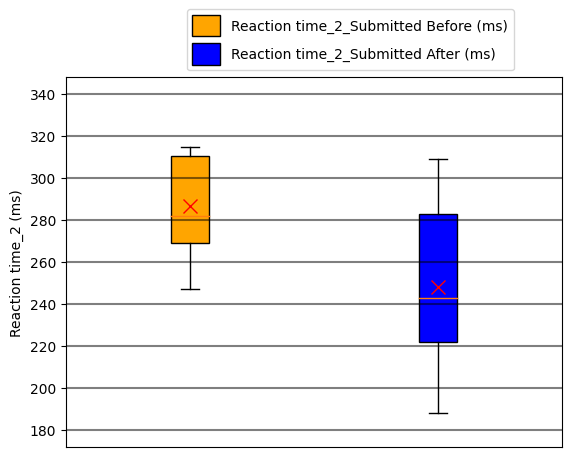

H_0 The variance in reaction time 2 for those who submitted before is less than or equal to those who sumbited after

H_a The variance in reaction time 2 for those who submitted before is more than those who sumitted after

Rejct null because P 0.0895 < alpha 0.1 is true 


In [14]:
#Dealing with the "Reaction time_2 set"
df['Reaction time_2 (ms)']=  pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=["Typing Speed (wpm)"])
df['Reaction time_2_Submitted Before (ms)'] =  pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=['Reaction time_2_Submitted Before (ms)'])
df['Reaction time_2_Submitted After (ms)'] = pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=['Reaction time_2_Submitted After (ms)'])

time_2_before = df['Reaction time_2_Submitted Before (ms)'].dropna()
time_2_after = df['Reaction time_2_Submitted After (ms)'].dropna()

description_reaction_1 = df['Reaction time_2 (ms)'].describe().dropna()
description_reaction_2= df["Reaction time_2_Submitted After (ms)"].describe().dropna()
std_deviation = description_reaction_1['std']  
after_mean = round(np.mean(time_2_after),6)
before_mean = round(np.mean(time_2_before),6)
df1 = len(time_2_before) - 1
df2 = len(time_2_after) - 1

statistic, p_value = levene(time_2_before , time_2_after)
variance1 = round(np.var(time_2_before, ddof=1),6)  # ddof=1 for sample variance
variance2 = round(np.var(time_2_after, ddof=1),6)
f_statistic = variance1 / variance2

alpha = 0.1
p_value_right = f.cdf(f_statistic, df1, df2)
f_critical = f.ppf(alpha, df1, df2)

Table_Before = {"Mean":[],"Variance":[],"Observations":[],"df":[],"F":[],"P(F<=f) one-tail":[],"F Critical one-tail":[]}
Table_After = {"Mean":[],"Variance":[],"Observations":[],"df":[]}
Table_Before['Mean'].append(before_mean)
Table_Before['Variance'].append(variance1)
Table_Before["Observations"].append(df1+1)
Table_Before['df'].append(df1)
Table_Before["F"].append(f_statistic)
Table_Before['P(F<=f) one-tail'].append(p_value_right)
Table_Before['F Critical one-tail'].append(f_critical)
#moding table after
Table_After["Mean"].append(after_mean)
Table_After['Variance'].append(variance2)
Table_After['df'].append(df2)
Table_After['Observations'].append(df2+1)
Two_sample_var_1 = pd.DataFrame(Table_Before).transpose()
Two_sample_var_2 = pd.DataFrame(Table_After).transpose()
#Two_sample_var['Reaction time_1_Submitted After (ms)'] = Table_After

print("F-Test Two-Sample for Variances\n")
Two_Sam_Var =  pd.concat([Two_sample_var_1, Two_sample_var_2], ignore_index=True, axis=1)
Labels = ['Reaction time_2_Submitted Before (ms)','Reaction time_2_Submitted After (ms)']
Two_Sam_Var.columns = Labels
print(Two_Sam_Var)
out=plt.boxplot([time_2_before, time_2_after],meanline=True,showfliers=True, flierprops=dict(markerfacecolor='pink', marker='o'),patch_artist=True)
target_box_color='orange'
out['boxes'][0].set_facecolor(target_box_color)
out['boxes'][1].set_facecolor('blue')
plt.plot( 1,before_mean, 'rx', markersize=10)
plt.plot(2, after_mean,'rx',markersize=10)
y_ticks = plt.yticks()[0]
# Add vertical lines at each y-axis tick
for y_tick in y_ticks:
    if y_tick < 0:
        continue
    else:
      plt.axhline(y=y_tick, color='black', linestyle='-', alpha=0.5)
legend_handles = [
    Patch(facecolor='orange', edgecolor='black',linewidth=1),
    Patch(facecolor='blue', edgecolor='black', linewidth=1),
]
print("\n")

plt.xticks([])
plt.legend(Labels)
plt.legend(legend_handles, Labels, handlelength=2, handleheight=2,bbox_to_anchor=(0.23, 1))
plt.ylabel('Reaction time_2 (ms)')
plt.show()

print("H_0 The variance in reaction time 2 for those who submitted before is less than or equal to those who sumbited after\n")
print("H_a The variance in reaction time 2 for those who submitted before is more than those who sumitted after\n")
if p_value_right < alpha :
   print(f"Rejct null because P {round(p_value_right,4)} < alpha {alpha} is true ")
else:
    print(f"Don't rejct null because P {round(p_value_right,4)} < alpha {alpha} is false ")

In [15]:
#From rejecting the Null we can say that the reaction time between the After and Before groups are different

                     Typing Speed_Low Quiz Scores (wpm)  \
Mean                                         53.2500000   
Variance                                    159.8409090   
Observations                                 12.0000000   
df                                           11.0000000   
F                                             0.8491174   
P(F<=f) one-tail                              0.3966648   
F Critical one-tail                           0.4527499   

                     Typing Speed_High Quiz Scores (wpm)  
Mean                                          68.9230770  
Variance                                     188.2435900  
Observations                                  13.0000000  
df                                            12.0000000  
F                                                    NaN  
P(F<=f) one-tail                                     NaN  
F Critical one-tail                                  NaN  




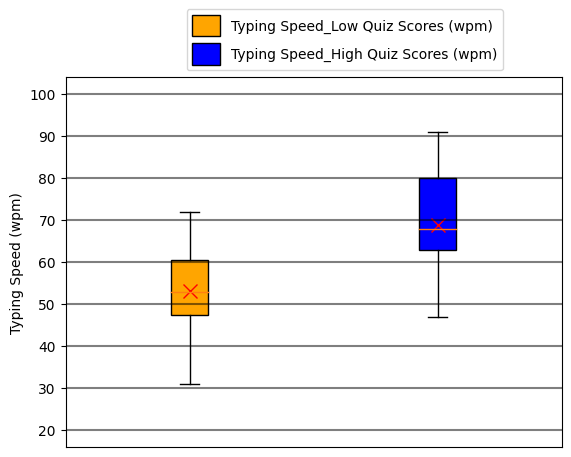

H_0 The variance in typing speed is the same for those who have high vs low quiz scores

H_a The variance in typing speed is different for those who have high vs low quiz scores

Don't rejct null because P 0.3967 < alpha 0.1 is false 


In [16]:
#Dealing with Typing Speed data set
df['Typing Speed (wpm)']=  pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=["Typing Speed (wpm)"])
df['Typing Speed_High Quiz Scores (wpm)'] =  pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=['Typing Speed_High Quiz Scores (wpm)'])
df['Typing Speed_Low Quiz Scores (wpm)'] = pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 11\Practice Portfolio 11 data.xlsx",usecols=['Typing Speed_Low Quiz Scores (wpm)'])

Wpm_Low = df['Typing Speed_Low Quiz Scores (wpm)'].dropna()
Wpm_High = df['Typing Speed_High Quiz Scores (wpm)'].dropna()

description_low = df['Typing Speed_Low Quiz Scores (wpm)'].describe().dropna()
description_high= df['Typing Speed_High Quiz Scores (wpm)'].describe().dropna()
std_deviation = description_low['std'] 
low_mean = round(np.mean(Wpm_Low),6)
high_mean = round(np.mean(Wpm_High),6)
df1 = len(Wpm_Low) - 1
df2 = len(Wpm_High) - 1

statistic, p_value = levene(Wpm_Low , Wpm_High)
variance1 = round(np.var(Wpm_Low , ddof=1),6)  # ddof=1 for sample variance
variance2 = round(np.var(Wpm_High, ddof=1),6)
f_statistic = variance1 / variance2

alpha = 0.1

p_value_right = f.cdf(f_statistic, df1, df2)
f_critical = f.ppf(alpha, df1, df2)
Table_Before = {"Mean":[],"Variance":[],"Observations":[],"df":[],"F":[],"P(F<=f) one-tail":[],"F Critical one-tail":[]}
Table_After = {"Mean":[],"Variance":[],"Observations":[],"df":[]}
Table_Before['Mean'].append(low_mean)
Table_Before['Variance'].append(variance1)
Table_Before["Observations"].append(df1+1)
Table_Before['df'].append(df1)
Table_Before["F"].append(f_statistic)
Table_Before['P(F<=f) one-tail'].append(p_value_right)
Table_Before['F Critical one-tail'].append(f_critical)
#moding table after
Table_After["Mean"].append(high_mean)
Table_After['Variance'].append(variance2)
Table_After['df'].append(df2)
Table_After['Observations'].append(df2+1)
Two_sample_var_1 = pd.DataFrame(Table_Before).transpose()
Two_sample_var_2 = pd.DataFrame(Table_After).transpose()

Two_Sam_Var =  pd.concat([Two_sample_var_1, Two_sample_var_2], ignore_index=True, axis=1)
Labels = ['Typing Speed_Low Quiz Scores (wpm)','Typing Speed_High Quiz Scores (wpm)']
Two_Sam_Var.columns = Labels

print(Two_Sam_Var)
out=plt.boxplot([Wpm_Low, Wpm_High],meanline=True,showfliers=True, flierprops=dict(markerfacecolor='pink', marker='o'),patch_artist=True)
target_box_color='orange'
out['boxes'][0].set_facecolor(target_box_color)
out['boxes'][1].set_facecolor('blue')
plt.plot( 1,low_mean, 'rx', markersize=10)
plt.plot(2, high_mean,'rx',markersize=10)
y_ticks = plt.yticks()[0]
# Add vertical lines at each y-axis tick
for y_tick in y_ticks:
    if y_tick < 0:
        continue
    else:
      plt.axhline(y=y_tick, color='black', linestyle='-', alpha=0.5)
legend_handles = [
    Patch(facecolor='orange', edgecolor='black',linewidth=1),
    Patch(facecolor='blue', edgecolor='black', linewidth=1),
]
print("\n")

plt.xticks([])
plt.legend(Labels)
plt.legend(legend_handles, Labels, handlelength=2, handleheight=2,bbox_to_anchor=(0.23, 1))
plt.ylabel('Typing Speed (wpm)')
plt.show()
print("H_0 The variance in typing speed is the same for those who have high vs low quiz scores\n")
print("H_a The variance in typing speed is different for those who have high vs low quiz scores\n")

if p_value_right < alpha :
    print(f"Rejct null because P {round(p_value_right,4)} < alpha {alpha} is true ")
else:
    print(f"Don't rejct null because P {round(p_value_right,4)} < alpha {alpha} is false ")

In [17]:
#From not rejecting the Null we can say that the typing speeds where realitvily the same 